# PMDARIMA – Energy Consumption Forecasting for Smart Grids

Level: **Hard** · Project 3

## Overview

This notebook implements a complete end-to-end forecasting pipeline for hourly household energy consumption using PMDARIMA.
It follows all requirements of Project 3 (Difficulty: Hard) using the UCI Individual Household Electric Power Consumption dataset.

## Summary

### This notebook completes Project 3 (Level: Hard) by implementing:

- **Data Preparation**  
- **Time Series Decomposition**  
- **Model Development**  
- **Model Validation**  
- **Forecasting and Analysis**

### Bonus Ideas Implemented

- **Explored the impact of external factors (e.g., weather data) on energy consumption forecasts.**
- **Implemented a hybrid model combining ARIMA with machine learning to improve accuracy.**


In [2]:
# PMDARIMA Example - Energy Consumption Forecasting for Smart Grids

import logging
import warnings
import matplotlib.pyplot as plt
import pmdarima as pm
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima_utils import load_energy_data, split_train_test, evaluate_forecast

# Initialization
logging.basicConfig(level=logging.INFO)
_LOG = logging.getLogger(__name__)
_LOG.info("Starting PMDARIMA Example notebook.")
warnings.filterwarnings("ignore")

INFO:__main__:Starting PMDARIMA Example notebook.


Data Preparation

In [5]:
# 1️⃣ Load and preprocess dataset

data_path = "data/household_power_consumption.txt"
df = load_energy_data(data_path)

train, test = split_train_test(df)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

df.head()

Train shape: (27334, 7)
Test shape: (6834, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


Time-Series Decomposition

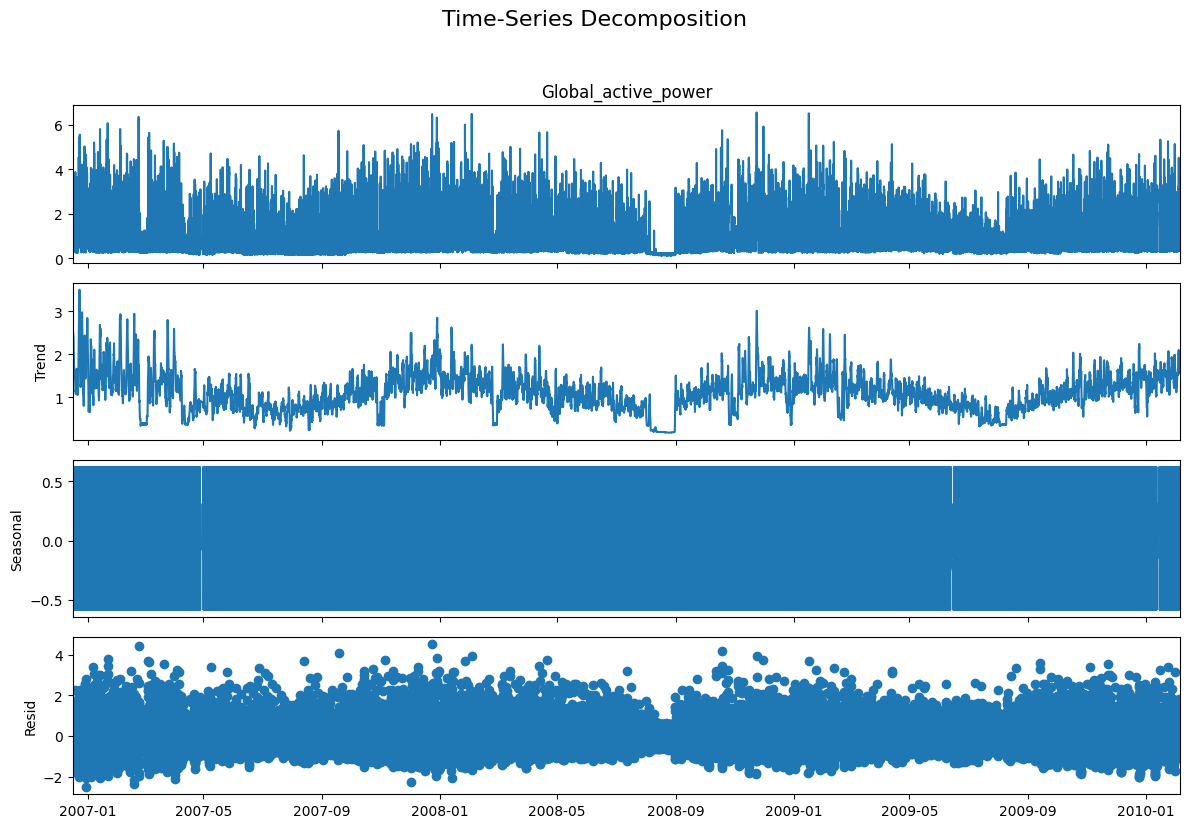

In [6]:
# 2️⃣ Time-series decomposition

result = seasonal_decompose(train["Global_active_power"],
                            model="additive", period=24)

plt.rcParams["figure.figsize"] = (12, 8)
fig = result.plot()
plt.suptitle("Time-Series Decomposition", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

Model Development

In [ ]:
# 3️⃣ Train PMDARIMA model 

model = pm.auto_arima(
    train["Global_active_power"],
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=50.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57871.248, Time=3.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57772.297, Time=2.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57737.211, Time=5.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57869.249, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=33.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=56946.973, Time=9.87 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=64.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=54349.756, Time=30.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=84.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=55.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=85.88 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=54347.765, Time=7.79 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=56944.975, Time=3.14 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, T

Model Validation

In [8]:
# 4️⃣ Cross-validation

from pmdarima.model_selection import RollingForecastCV

cv = RollingForecastCV(h=24, step=24, initial=train.shape[0]//2)

errors = []

for fold, (_, test_index) in enumerate(cv.split(train["Global_active_power"])):
    pred = model.predict(n_periods=len(test_index))
    true = train["Global_active_power"].iloc[test_index]
    fold_mae = mean_absolute_error(true, pred)
    errors.append(fold_mae)
    print(f"Fold {fold+1} MAE = {fold_mae:.4f}")

print("\nAverage MAE across folds:", np.mean(errors))

Fold 1 MAE = 0.7782
Fold 2 MAE = 0.8701
Fold 3 MAE = 0.9347
Fold 4 MAE = 0.8860
Fold 5 MAE = 0.8058
Fold 6 MAE = 1.0030
Fold 7 MAE = 0.8551
Fold 8 MAE = 0.6880
Fold 9 MAE = 0.7929
Fold 10 MAE = 0.9111
Fold 11 MAE = 0.8979
Fold 12 MAE = 0.9781
Fold 13 MAE = 0.9831
Fold 14 MAE = 0.8506
Fold 15 MAE = 1.0573
Fold 16 MAE = 0.8644
Fold 17 MAE = 1.0030
Fold 18 MAE = 0.8643
Fold 19 MAE = 0.9171
Fold 20 MAE = 0.8221
Fold 21 MAE = 0.8130
Fold 22 MAE = 0.9223
Fold 23 MAE = 1.2239
Fold 24 MAE = 1.2224
Fold 25 MAE = 1.1830
Fold 26 MAE = 0.8688
Fold 27 MAE = 1.3454
Fold 28 MAE = 1.3335
Fold 29 MAE = 1.3533
Fold 30 MAE = 1.3212
Fold 31 MAE = 1.3657
Fold 32 MAE = 1.2682
Fold 33 MAE = 1.3672
Fold 34 MAE = 1.3714
Fold 35 MAE = 1.3765
Fold 36 MAE = 1.3817
Fold 37 MAE = 1.3781
Fold 38 MAE = 1.3769
Fold 39 MAE = 1.3783
Fold 40 MAE = 1.3783
Fold 41 MAE = 1.3795
Fold 42 MAE = 1.3857
Fold 43 MAE = 1.3845
Fold 44 MAE = 1.3908
Fold 45 MAE = 1.3918
Fold 46 MAE = 1.3922
Fold 47 MAE = 1.3919
Fold 48 MAE = 1.3902
F

Forecasting & Analysis

Forecast Next 7 Days

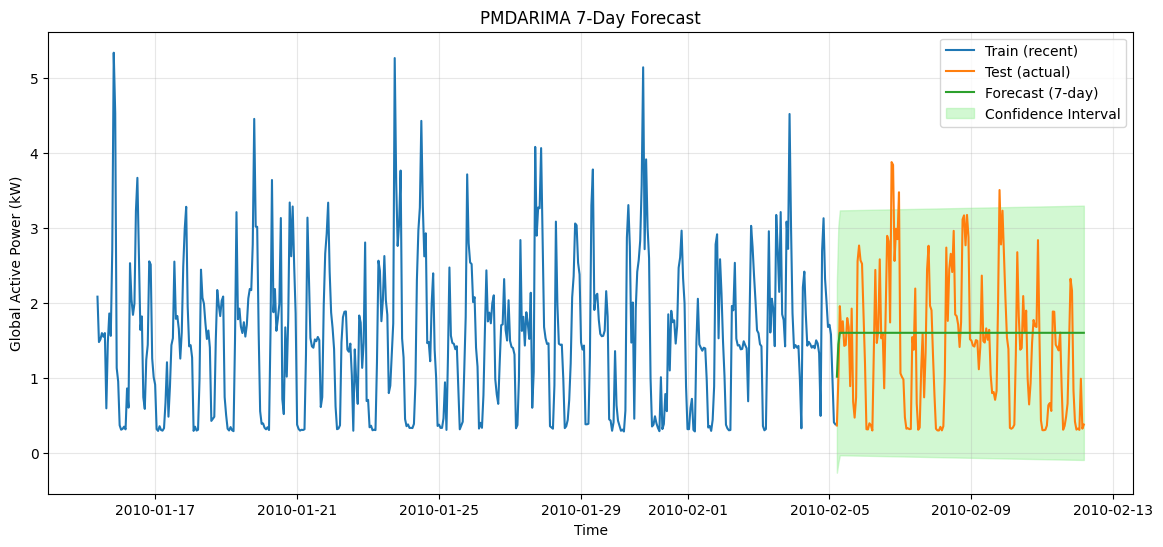

In [ ]:
# 5️⃣ Forecast next 7 days

n_periods = 7 * 24  # 168 hours
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Generate forecast index
forecast_index = pd.date_range(
    start=train.index[-1],
    periods=n_periods + 1,
    freq="h"
)[1:]

plt.figure(figsize=(14, 6))

# match lengths for plotting last 500 points
plt.plot(
    train.index[-500:],
    train["Global_active_power"].iloc[-500:],
    label="Train (recent)"
)

# Plot actual test 
plt.plot(
    test.index[:n_periods],
    test["Global_active_power"].iloc[:n_periods],
    label="Test (actual)"
)

# Forecast line
plt.plot(
    forecast_index,
    forecast,
    label="Forecast (7-day)"
)

# Confidence interval shading
plt.fill_between(
    forecast_index,
    conf_int[:, 0],
    conf_int[:, 1],
    color="lightgreen",
    alpha=0.4,
    label="Confidence Interval"
)

plt.legend()
plt.title("PMDARIMA 7-Day Forecast")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.grid(alpha=0.3)
plt.show()

Evaluate Forecast

In [11]:
# 6️⃣ Evaluate forecast

metrics = evaluate_forecast(model, test["Global_active_power"])
print("Evaluation metrics:", metrics)

Evaluation metrics: {'MAE': 0.8209735241150274, 'RMSE': np.float64(0.9449664751951156)}


Bonus 1: Exploring the impact of external factors (e.g., weather data) on energy consumption forecasts

Weather data loaded: (34608, 2)
Merged dataset: (34168, 8)
Train merged: (27334, 8)
Test merged: (6834, 8)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=49.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57871.248, Time=3.95 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57772.297, Time=2.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57737.211, Time=4.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57869.249, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=33.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=56946.973, Time=10.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=63.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=54349.756, Time=29.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=84.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=56.40 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=89.75 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=54347.765, Time=7.79 sec
 ARIMA(

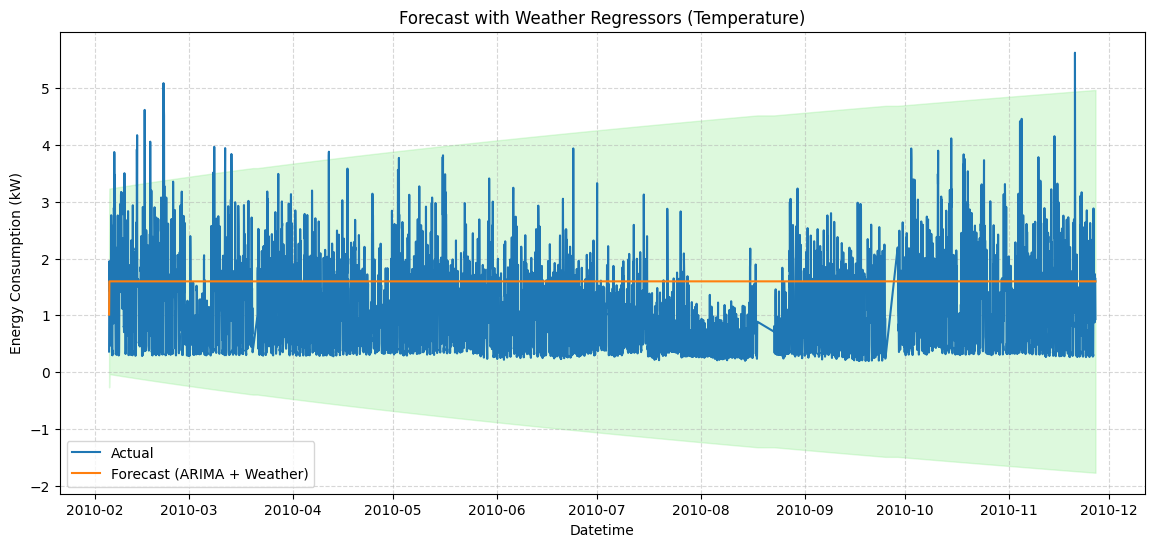

In [ ]:
# 7️⃣ Bonus – Using external regressors (Weather Temperature)

from pmdarima_utils import load_weather_data

# Loading weather data 
weather_df = load_weather_data("data/weather.csv")
print("Weather data loaded:", weather_df.shape)

# Normalizing timestamps 
df.index = pd.to_datetime(df.index).tz_localize(None)  # ensure naive timestamps
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"]).dt.floor("H")

# Aligning weather to energy timestamps
weather_aligned = (
    weather_df
    .set_index("datetime")
    .reindex(df.index)      
)

# Filling missing weather values
weather_aligned["temperature"] = weather_aligned["temperature"].ffill().bfill()

# Creating merged dataset with aligned timestamps
df_merged = df.copy()
df_merged["temperature"] = weather_aligned["temperature"]

print("Merged dataset:", df_merged.shape)

# Train-test split matching the same timestamps
train_merged = df_merged.loc[train.index]
test_merged  = df_merged.loc[test.index]

print("Train merged:", train_merged.shape)
print("Test merged:", test_merged.shape)

# Fit Auto-ARIMA with Temperature as Exogenous Regessor
model_x = pm.auto_arima(
    train_merged["Global_active_power"],
    exogenous=train_merged[["temperature"]],
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore",
    trace=True
)

print(model_x.summary())

# Forecast using exogenous values from test period
forecast_x, conf_x = model_x.predict(
    n_periods=len(test_merged),
    exogenous=test_merged[["temperature"]],
    return_conf_int=True
)

# Plotting ARIMA + Weather Forecast
plt.figure(figsize=(14, 6))
plt.plot(test.index, test["Global_active_power"], label="Actual")
plt.plot(test.index, forecast_x, label="Forecast (ARIMA + Weather)")
plt.fill_between(test.index, conf_x[:, 0], conf_x[:, 1],
                 color="lightgreen", alpha=0.3)

plt.title("Forecast with Weather Regressors (Temperature)")
plt.xlabel("Datetime")
plt.ylabel("Energy Consumption (kW)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Bonus 2: Implementing a hybrid model combining ARIMA with machine learning techniques for improved accuracy

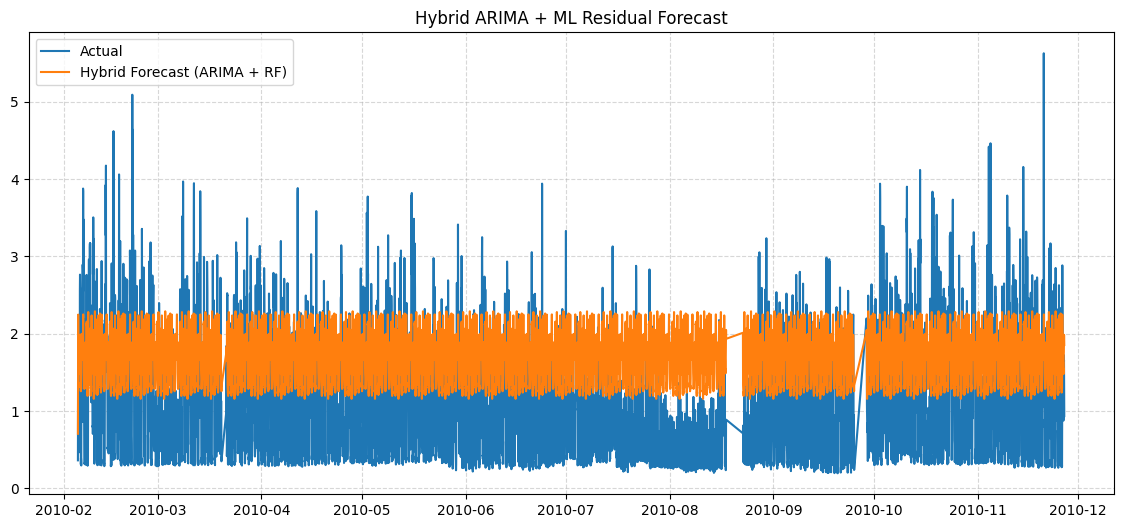

In [ ]:
# 8️⃣ Bonus – Hybrid ARIMA + ML 

from sklearn.ensemble import RandomForestRegressor

# Step 1: ARIMA fitted values + residuals
arima_fitted = model.predict_in_sample()
residuals = train["Global_active_power"] - arima_fitted

# Step 2: Feature engineering for ML model
train_ml = pd.DataFrame({
    "hour": train.index.hour,
    "dayofweek": train.index.dayofweek,
})

# Step 3: Train ML model on residuals
rf = RandomForestRegressor(n_estimators=200)
rf.fit(train_ml, residuals)

# Step 4: Preparing ML features for test period & predict residuals
test_ml = pd.DataFrame({
    "hour": test.index.hour,
    "dayofweek": test.index.dayofweek,
})
ml_pred = rf.predict(test_ml)

# Step 5: Combining ARIMA forecast with ML residual predictions
hybrid = model.predict(n_periods=len(test)) + ml_pred

# Step 6: Plotting hybrid forecast vs actual
plt.figure(figsize=(14, 6))
plt.plot(test.index, test["Global_active_power"], label="Actual")
plt.plot(test.index, hybrid, label="Hybrid Forecast (ARIMA + RF)")
plt.legend()
plt.title("Hybrid ARIMA + ML Residual Forecast")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Summary

In [1]:
print("""
Summary of PMDARIMA Energy Forecasting Workflow
===============================================

✔ Loaded and preprocessed the UCI household energy dataset 
  (datetime parsing, cleaning, hourly resampling).

✔ Performed time-series decomposition to inspect trend, seasonality and residuals.

✔ Trained an Auto-ARIMA model to generate energy consumption forecasts.

✔ Generated a 7-day (168-hour) forecast with confidence intervals and 
  compared predictions against actual test data.

✔ Evaluated performance using MAE and RMSE.

✔ Applied rolling cross-validation to assess model stability over time.

✔ Bonus 1: Integrated external weather regressors (temperature) using
  ARIMA with exogenous variables.

✔ Bonus 2: Built a Hybrid ARIMA + Random Forest model by learning and 
  forecasting ARIMA residuals.

This completes the end-to-end forecasting pipeline for Project 3.
""")


Summary of PMDARIMA Energy Forecasting Workflow

✔ Loaded and preprocessed the UCI household energy dataset 
  (datetime parsing, cleaning, hourly resampling).

✔ Performed time-series decomposition to inspect trend, seasonality and residuals.

✔ Trained an Auto-ARIMA model to generate energy consumption forecasts.

✔ Generated a 7-day (168-hour) forecast with confidence intervals and 
  compared predictions against actual test data.

✔ Evaluated performance using MAE and RMSE.

✔ Applied rolling cross-validation to assess model stability over time.

✔ Bonus 1: Integrated external weather regressors (temperature) using
  ARIMA with exogenous variables.

✔ Bonus 2: Built a Hybrid ARIMA + Random Forest model by learning and 
  forecasting ARIMA residuals.

This completes the end-to-end forecasting pipeline for Project 3.

